Ghana Maize Yield Prediction - Exploratory Data Analysis

**Project**: Ghana Maize Yield Prediction System

**Objective**
This notebook performs comprehensive exploratory data analysis (EDA) on the maize yield dataset to:
# - Understand data structure and quality
# - Identify patterns and relationships
# - Detect anomalies and outliers
# - Guide feature engineering decisions
# - Inform model selection

1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
data_path = Path('../data/raw/Maize_dataset.csv')

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}")
    print("Please ensure the file is in the correct location.")

Dataset loaded successfully!
Shape: 1,775 rows × 12 columns


2. Initial Data Inspection

In [3]:
# Display first few rows
print("=" * 80)
print("FIRST 10 ROWS OF THE DATASET")
print("=" * 80)
df.head(10)

FIRST 10 ROWS OF THE DATASET


,District,Year,Yield,Rainfall,Temperature,Humidity,Sunlight,Soil_Moisture,Soil_Type,Pest_Risk,PFJ_Policy,Yield_Lag1
0,A.M.A,2011,1.53,670.85,25.852745,87.471373,15.939739,0.827974,Coastal Savannah,0,0,1.00
1,A.M.A,2012,1.85,683.60,25.591503,86.877582,16.625163,0.814248,Coastal Savannah,0,0,1.53
2,A.M.A,2013,1.80,481.38,25.802222,85.133856,16.894248,0.761242,Coastal Savannah,0,0,1.85
3,A.M.A,2014,1.34,596.92,26.129346,85.771699,16.374771,0.782484,Coastal Savannah,0,0,1.80
4,A.M.A,2015,1.30,516.07,26.004052,86.899477,16.843137,0.793595,Coastal Savannah,0,0,1.34
5,A.M.A,2016,1.39,597.66,26.058693,87.516340,16.960131,0.787451,Coastal Savannah,1,0,1.30
6,A.M.A,2017,2.04,759.02,25.991830,88.016601,16.473987,0.859020,Coastal Savannah,1,1,1.39
7,A.M.A,2018,2.25,656.68,25.936078,87.436209,17.311569,0.823987,Coastal Savannah,0,1,2.04
8,A.M.A,2019,2.53,727.46,26.161699,88.030392,17.152614,0.855882,Coastal Savannah,0,1,2.25
9,A.M.A,2020,2.58,715.90,25.888431,87.022614,17.599804,0.827516,Coastal Savannah,0,1,2.53


In [4]:
# Display last few rows
print("=" * 80)
print("LAST 10 ROWS OF THE DATASET")
print("=" * 80)
df.tail(10)

LAST 10 ROWS OF THE DATASET


,District,Year,Yield,Rainfall,Temperature,Humidity,Sunlight,Soil_Moisture,Soil_Type,Pest_Risk,PFJ_Policy,Yield_Lag1
1765,Zabzugu/Tatale,2012,1.50,892.43,26.246797,81.088693,17.667320,0.587778,Savanna Ochrosol,0,0,1.52
1766,Zabzugu/Tatale,2013,1.49,669.10,26.749477,78.826928,18.197320,0.555359,Savanna Ochrosol,0,0,1.50
1767,Zabzugu/Tatale,2014,1.41,683.81,27.389346,76.140261,18.246013,0.523922,Savanna Ochrosol,0,0,1.49
1768,Zabzugu/Tatale,2015,1.99,589.26,27.851242,72.128954,18.464837,0.487843,Savanna Ochrosol,0,0,1.41
1769,Zabzugu/Tatale,2016,1.90,832.31,27.277647,78.192876,18.359804,0.554837,Savanna Ochrosol,1,0,1.99
1770,Zabzugu/Tatale,2017,2.04,949.71,27.290850,77.446797,17.766471,0.559412,Savanna Ochrosol,1,1,1.90
1771,Zabzugu/Tatale,2018,2.25,777.88,26.903922,78.688562,18.094118,0.548954,Savanna Ochrosol,0,1,2.04
1772,Zabzugu/Tatale,2019,2.53,798.27,27.314248,78.131569,18.188301,0.544967,Savanna Ochrosol,0,1,2.25
1773,Zabzugu/Tatale,2020,2.58,838.97,26.931373,79.364837,18.549085,0.565359,Savanna Ochrosol,0,1,2.53
1774,Zabzugu/Tatale,2021,2.53,781.71,27.340392,76.147124,18.882549,0.539216,Savanna Ochrosol,0,1,2.58


In [5]:
# Basic information about the dataset
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       1775 non-null   object 
 1   Year           1775 non-null   int64  
 2   Yield          1775 non-null   float64
 3   Rainfall       1775 non-null   float64
 4   Temperature    1775 non-null   float64
 5   Humidity       1775 non-null   float64
 6   Sunlight       1775 non-null   float64
 7   Soil_Moisture  1775 non-null   float64
 8   Soil_Type      1775 non-null   object 
 9   Pest_Risk      1775 non-null   int64  
 10  PFJ_Policy     1775 non-null   int64  
 11  Yield_Lag1     1775 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 166.5+ KB


In [6]:
# Statistical summary of numerical features
print("=" * 80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("=" * 80)
df.describe().T

STATISTICAL SUMMARY - NUMERICAL FEATURES


,count,mean,std,min,25%,50%,75%,max
Year,1775.0,2016.412958,3.069865,2010.000000,2014.000000,2017.000000,2019.000000,2021.000000
Yield,1775.0,2.052383,0.525001,0.270000,1.650000,2.200000,2.530000,3.970000
Rainfall,1775.0,735.538597,146.612734,369.810000,647.215000,742.660000,832.430000,1229.970000
Temperature,1775.0,26.277535,1.037208,24.393399,25.479869,25.965425,26.935000,29.476601
Humidity,1775.0,82.292908,5.723651,61.818431,79.012288,83.758824,86.882026,90.376471
Sunlight,1775.0,17.359001,1.221369,14.919020,16.473987,17.048301,18.041176,20.920131
Soil_Moisture,1775.0,0.654544,0.089645,0.449935,0.584967,0.642092,0.728758,0.874052
Pest_Risk,1775.0,0.190986,0.393189,0.000000,0.000000,0.000000,0.000000,1.000000
PFJ_Policy,1775.0,0.512676,0.499980,0.000000,0.000000,1.000000,1.000000,1.000000
Yield_Lag1,1775.0,1.966349,0.529693,0.270000,1.500000,2.040000,2.475000,4.000000


In [7]:
# Check data types
print("=" * 80)
print("DATA TYPES")
print("=" * 80)
print(df.dtypes)
print("\n")
print("Numerical columns:", df.select_dtypes(include=[np.number]).columns.tolist())
print("Categorical columns:", df.select_dtypes(include=['object']).columns.tolist())

DATA TYPES
District          object
Year               int64
Yield            float64
Rainfall         float64
Temperature      float64
Humidity         float64
Sunlight         float64
Soil_Moisture    float64
Soil_Type         object
Pest_Risk          int64
PFJ_Policy         int64
Yield_Lag1       float64
dtype: object


Numerical columns: ['Year', 'Yield', 'Rainfall', 'Temperature', 'Humidity', 'Sunlight', 'Soil_Moisture', 'Pest_Risk', 'PFJ_Policy', 'Yield_Lag1']
Categorical columns: ['District', 'Soil_Type']


3. Data Quality Assessment

In [8]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
else:
    print("No missing values found in the dataset!")

MISSING VALUES ANALYSIS
No missing values found in the dataset!


In [9]:
# Check for duplicate rows
print("=" * 80)
print("DUPLICATE ROWS CHECK")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(['District', 'Year']))
else:
    print("No duplicate rows found!")

DUPLICATE ROWS CHECK
Number of duplicate rows: 0
No duplicate rows found!


In [10]:
# Check for duplicate District-Year combinations
print("=" * 80)
print("DISTRICT-YEAR COMBINATIONS CHECK")
print("=" * 80)

duplicate_combinations = df.groupby(['District', 'Year']).size()
duplicate_combinations = duplicate_combinations[duplicate_combinations > 1]

if len(duplicate_combinations) > 0:
    print(f"Found {len(duplicate_combinations)} duplicate District-Year combinations:")
    print(duplicate_combinations)
else:
    print("No duplicate District-Year combinations!")

DISTRICT-YEAR COMBINATIONS CHECK
Found 1 duplicate District-Year combinations:
District    Year
Kwahu West  2011    2
dtype: int64


4. Target Variable Analysis (Yield)

In [11]:
# Yield distribution
print("=" * 80)
print("YIELD DISTRIBUTION STATISTICS")
print("=" * 80)

yield_stats = df['Yield'].describe()
print(yield_stats)
print(f"\nSkewness: {df['Yield'].skew():.4f}")
print(f"Kurtosis: {df['Yield'].kurtosis():.4f}")

YIELD DISTRIBUTION STATISTICS
count    1775.000000
mean        2.052383
std         0.525001
min         0.270000
25%         1.650000
50%         2.200000
75%         2.530000
max         3.970000
Name: Yield, dtype: float64

Skewness: -0.5016
Kurtosis: -0.4399


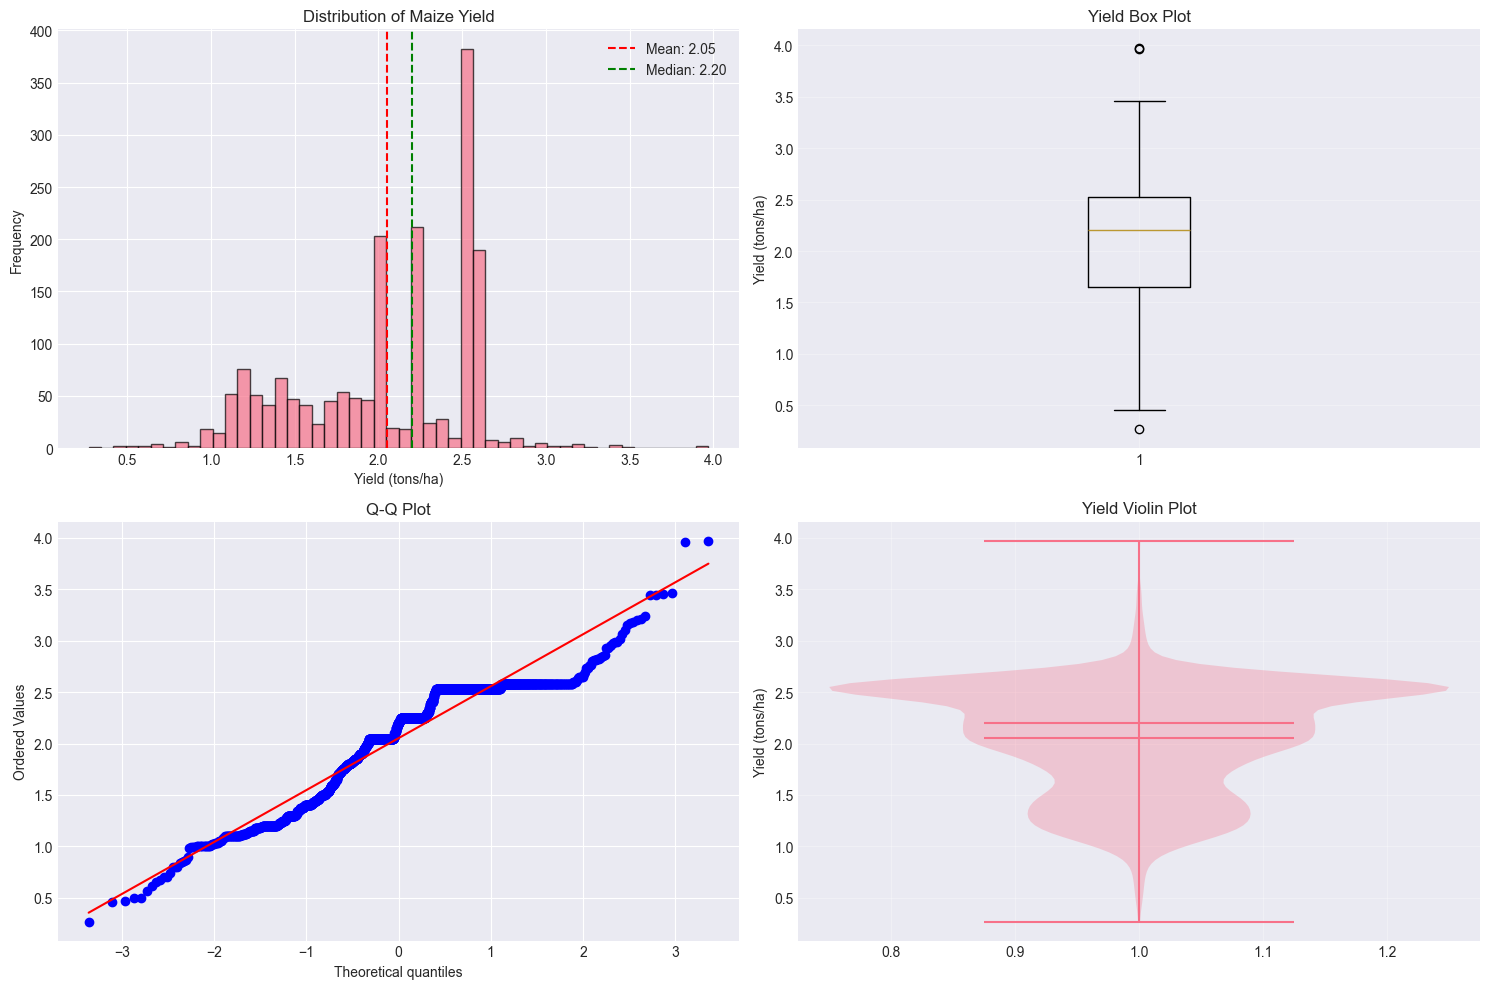

In [12]:
# Visualize yield distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['Yield'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Yield (tons/ha)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Maize Yield')
axes[0, 0].axvline(df['Yield'].mean(), color='red', linestyle='--', label=f'Mean: {df["Yield"].mean():.2f}')
axes[0, 0].axvline(df['Yield'].median(), color='green', linestyle='--', label=f'Median: {df["Yield"].median():.2f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['Yield'], vert=True)
axes[0, 1].set_ylabel('Yield (tons/ha)')
axes[0, 1].set_title('Yield Box Plot')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(df['Yield'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# Violin plot
axes[1, 1].violinplot(df['Yield'], vert=True, showmeans=True, showmedians=True)
axes[1, 1].set_ylabel('Yield (tons/ha)')
axes[1, 1].set_title('Yield Violin Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


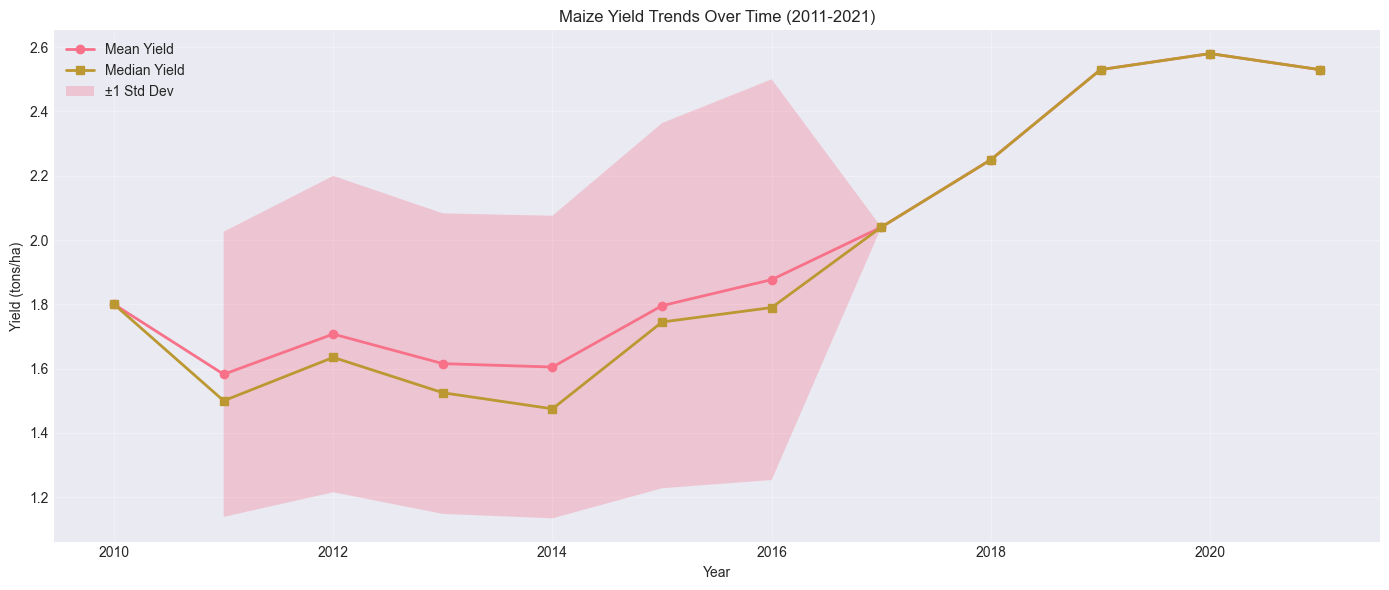


📈 Yield Trend Analysis:
Average yield in 2011: 1.58 tons/ha
Average yield in 2021: 2.53 tons/ha
Overall change: 59.88%


In [13]:
# Yield over time
fig, ax = plt.subplots(figsize=(14, 6))

yearly_yield = df.groupby('Year')['Yield'].agg(['mean', 'median', 'std'])
ax.plot(yearly_yield.index, yearly_yield['mean'], marker='o', linewidth=2, label='Mean Yield')
ax.plot(yearly_yield.index, yearly_yield['median'], marker='s', linewidth=2, label='Median Yield')
ax.fill_between(yearly_yield.index, 
                yearly_yield['mean'] - yearly_yield['std'], 
                yearly_yield['mean'] + yearly_yield['std'], 
                alpha=0.3, label='±1 Std Dev')

ax.set_xlabel('Year')
ax.set_ylabel('Yield (tons/ha)')
ax.set_title('Maize Yield Trends Over Time (2011-2021)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📈 Yield Trend Analysis:")
print(f"Average yield in 2011: {df[df['Year'] == 2011]['Yield'].mean():.2f} tons/ha")
print(f"Average yield in 2021: {df[df['Year'] == 2021]['Yield'].mean():.2f} tons/ha")
print(f"Overall change: {((df[df['Year'] == 2021]['Yield'].mean() / df[df['Year'] == 2011]['Yield'].mean() - 1) * 100):.2f}%")

5. Categorical Variables Analysis

In [14]:
# District analysis
print("=" * 80)
print("DISTRICT ANALYSIS")
print("=" * 80)

print(f"Total number of districts: {df['District'].nunique()}")
print(f"\nTop 10 districts by number of records:")
district_counts = df['District'].value_counts().head(10)
print(district_counts)

DISTRICT ANALYSIS
Total number of districts: 182

Top 10 districts by number of records:
District
Kwahu West                     13
A.M.A                          11
Dangme East                    11
Nadowli                        11
Mfantsiman                     11
Lawra                          11
Kwaebibirem                    11
Krachi West                    11
Krachi East                    11
Komenda Edina Eguafo Abirem    11
Name: count, dtype: int64


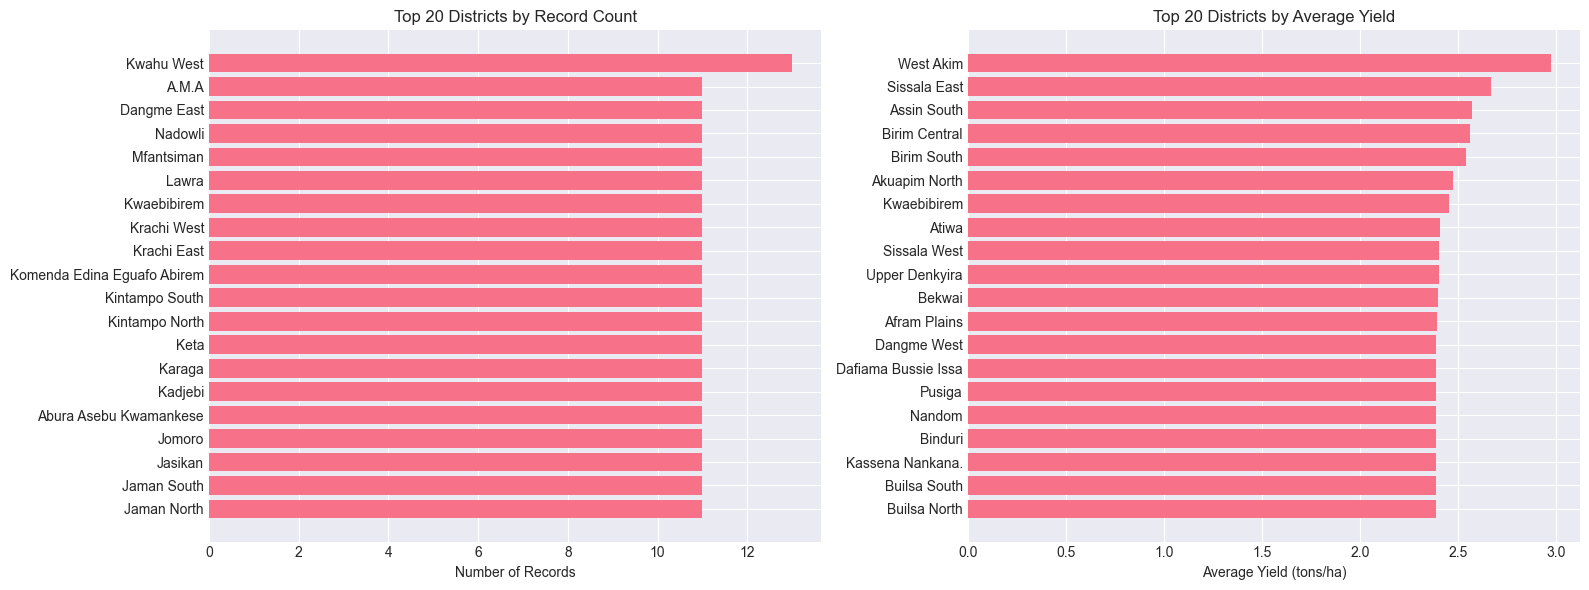

In [15]:
# Visualize district distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 districts by record count
top_districts = df['District'].value_counts().head(20)
axes[0].barh(range(len(top_districts)), top_districts.values)
axes[0].set_yticks(range(len(top_districts)))
axes[0].set_yticklabels(top_districts.index)
axes[0].set_xlabel('Number of Records')
axes[0].set_title('Top 20 Districts by Record Count')
axes[0].invert_yaxis()

# Top 20 districts by average yield
top_yield_districts = df.groupby('District')['Yield'].mean().sort_values(ascending=False).head(20)
axes[1].barh(range(len(top_yield_districts)), top_yield_districts.values)
axes[1].set_yticks(range(len(top_yield_districts)))
axes[1].set_yticklabels(top_yield_districts.index)
axes[1].set_xlabel('Average Yield (tons/ha)')
axes[1].set_title('Top 20 Districts by Average Yield')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [16]:
# Soil Type analysis
print("=" * 80)
print("SOIL TYPE ANALYSIS")
print("=" * 80)

soil_type_stats = df.groupby('Soil_Type').agg({
    'Yield': ['count', 'mean', 'std', 'min', 'max']
}).round(2)
print(soil_type_stats)

SOIL TYPE ANALYSIS
                     Yield                        
                     count  mean   std   min   max
Soil_Type                                         
Coastal Savannah       100  1.80  0.72  0.27  2.58
Forest Ochrosol       1047  2.10  0.50  0.62  3.97
Savanna Ochrosol       424  1.99  0.55  0.70  3.46
Tropical Black Earth   204  2.06  0.47  0.98  2.58


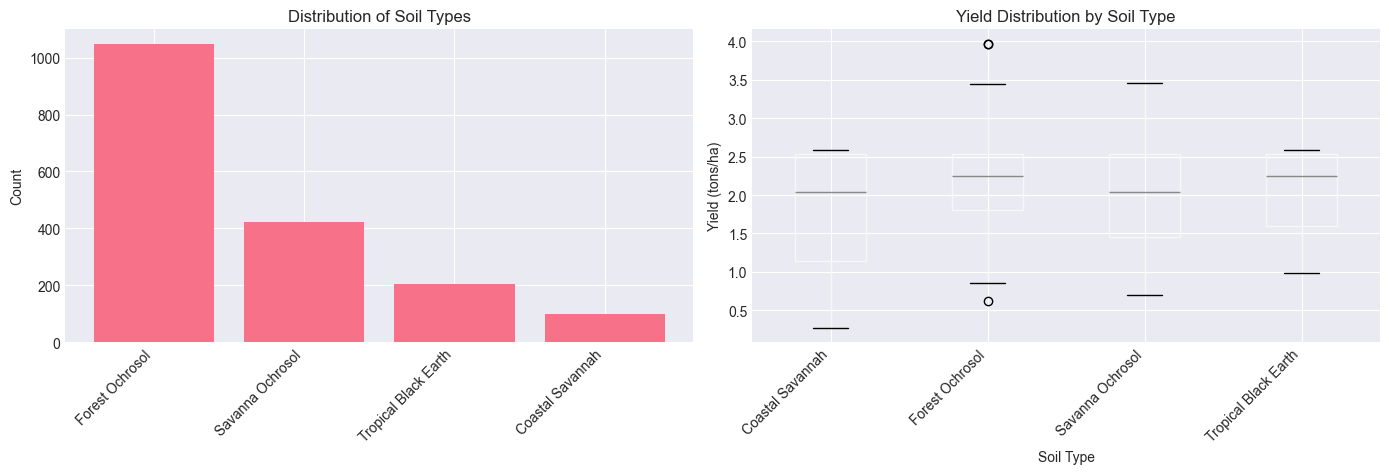

In [17]:
# Visualize soil type impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of soil types
soil_counts = df['Soil_Type'].value_counts()
axes[0].bar(range(len(soil_counts)), soil_counts.values)
axes[0].set_xticks(range(len(soil_counts)))
axes[0].set_xticklabels(soil_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Soil Types')

# Yield by soil type
df.boxplot(column='Yield', by='Soil_Type', ax=axes[1])
axes[1].set_xlabel('Soil Type')
axes[1].set_ylabel('Yield (tons/ha)')
axes[1].set_title('Yield Distribution by Soil Type')
axes[1].get_figure().suptitle('')  # Remove default title
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

6. Environmental Variables Analysis

In [18]:
# Environmental variables statistics
print("=" * 80)
print("ENVIRONMENTAL VARIABLES STATISTICS")
print("=" * 80)

env_vars = ['Rainfall', 'Temperature', 'Humidity', 'Sunlight', 'Soil_Moisture']
env_stats = df[env_vars].describe().T
print(env_stats)

ENVIRONMENTAL VARIABLES STATISTICS
                count        mean         std         min         25%  \
Rainfall       1775.0  735.538597  146.612734  369.810000  647.215000   
Temperature    1775.0   26.277535    1.037208   24.393399   25.479869   
Humidity       1775.0   82.292908    5.723651   61.818431   79.012288   
Sunlight       1775.0   17.359001    1.221369   14.919020   16.473987   
Soil_Moisture  1775.0    0.654544    0.089645    0.449935    0.584967   

                      50%         75%          max  
Rainfall       742.660000  832.430000  1229.970000  
Temperature     25.965425   26.935000    29.476601  
Humidity        83.758824   86.882026    90.376471  
Sunlight        17.048301   18.041176    20.920131  
Soil_Moisture    0.642092    0.728758     0.874052  


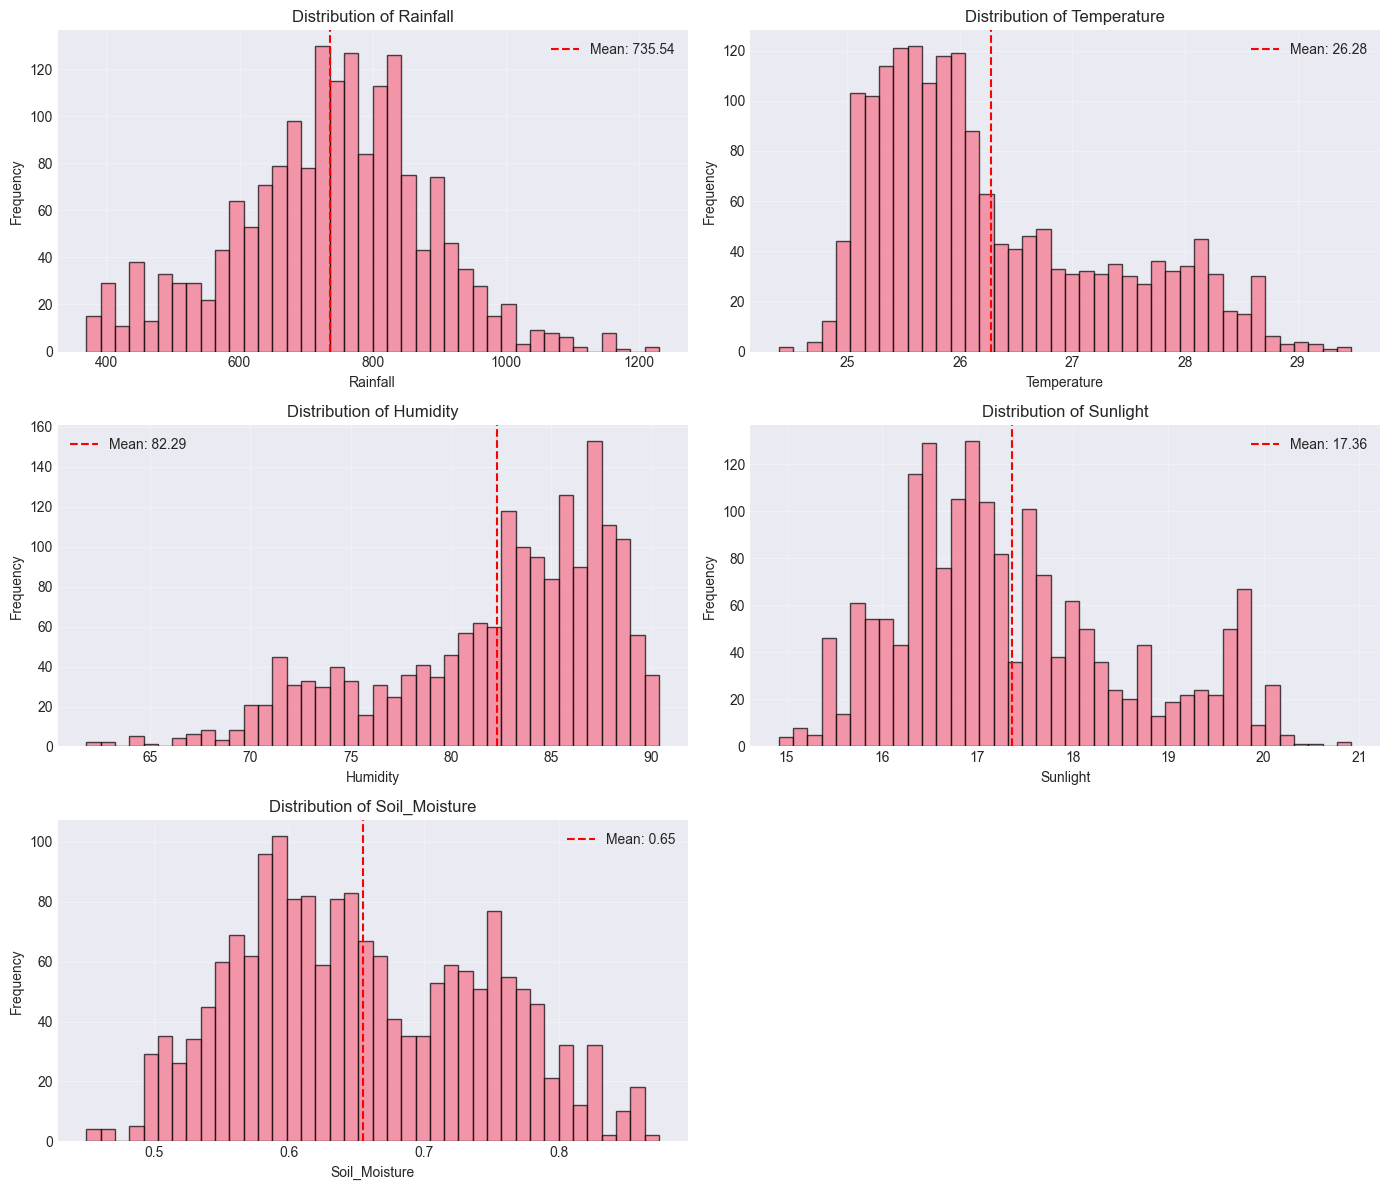

In [19]:
# Visualize environmental variables distributions
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, var in enumerate(env_vars):
    axes[idx].hist(df[var], bins=40, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {var}')
    axes[idx].axvline(df[var].mean(), color='red', linestyle='--', label=f'Mean: {df[var].mean():.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Remove the last subplot (we have 5 variables, 6 subplots)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

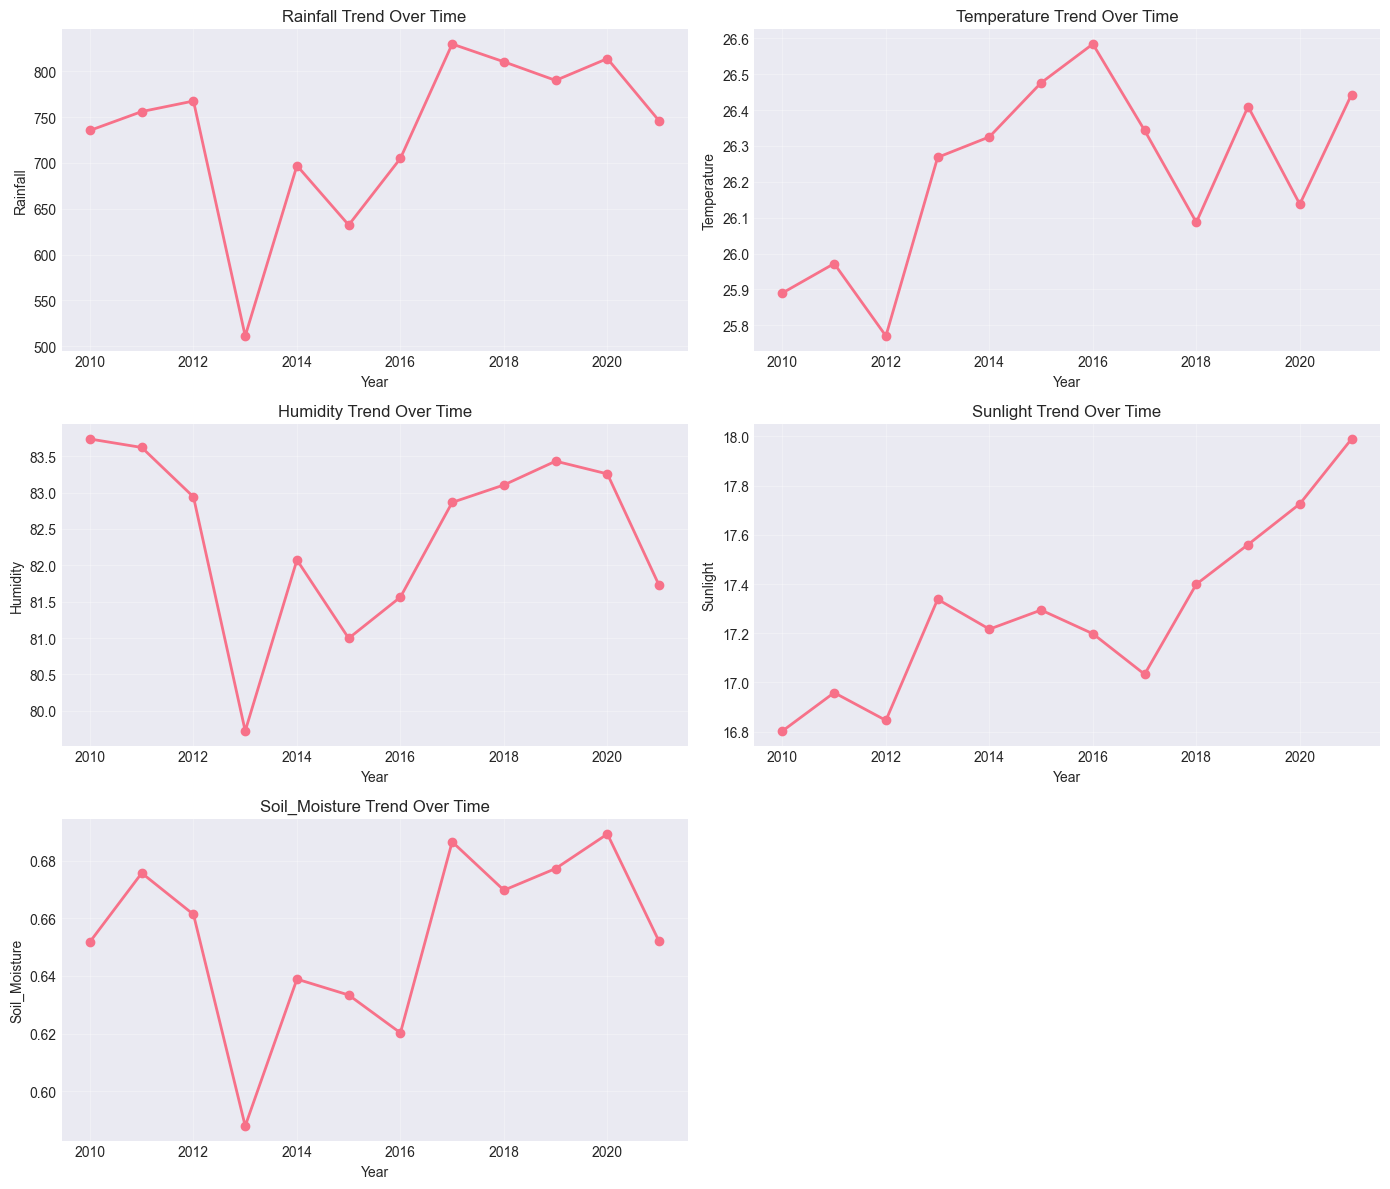

In [20]:
# Environmental variables over time
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, var in enumerate(env_vars):
    yearly_avg = df.groupby('Year')[var].mean()
    axes[idx].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(var)
    axes[idx].set_title(f'{var} Trend Over Time')
    axes[idx].grid(True, alpha=0.3)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

7. Policy and Risk Variables Analysis

In [21]:
# PFJ Policy analysis
print("=" * 80)
print("PFJ POLICY IMPACT ANALYSIS")
print("=" * 80)

policy_stats = df.groupby('PFJ_Policy').agg({
    'Yield': ['count', 'mean', 'std']
}).round(2)
policy_stats.columns = ['Count', 'Mean_Yield', 'Std_Yield']
print(policy_stats)

PFJ POLICY IMPACT ANALYSIS
            Count  Mean_Yield  Std_Yield
PFJ_Policy                              
0             865        1.70       0.53
1             910        2.39       0.21


In [22]:
# Statistical test
from scipy.stats import ttest_ind
policy_0 = df[df['PFJ_Policy'] == 0]['Yield']
policy_1 = df[df['PFJ_Policy'] == 1]['Yield']
t_stat, p_value = ttest_ind(policy_0, policy_1)
print(f"\nT-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("PFJ Policy has a statistically significant impact on yield!")
else:
    print("No statistically significant impact detected")


T-test results:
t-statistic: -36.2046
p-value: 0.0000
PFJ Policy has a statistically significant impact on yield!


In [23]:
# Pest Risk analysis
print("=" * 80)
print("PEST RISK ANALYSIS")
print("=" * 80)

pest_stats = df.groupby('Pest_Risk').agg({
    'Yield': ['count', 'mean', 'std']
}).round(2)
pest_stats.columns = ['Count', 'Mean_Yield', 'Std_Yield']
print(pest_stats)

PEST RISK ANALYSIS
           Count  Mean_Yield  Std_Yield
Pest_Risk                              
0           1436        2.07       0.54
1            339        1.96       0.43


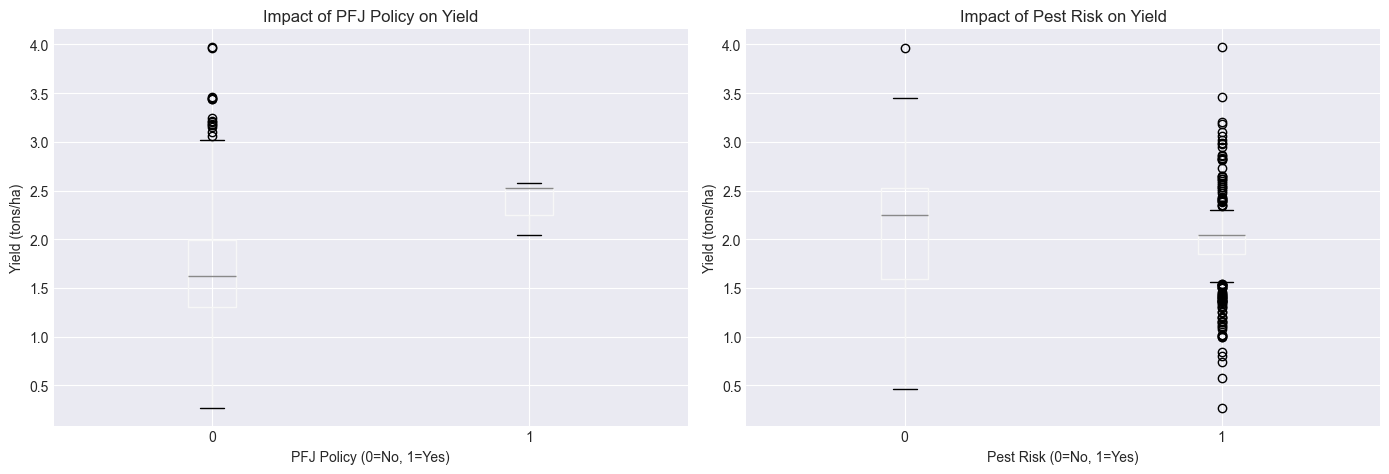

In [24]:
# Visualize policy and pest risk impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PFJ Policy impact
df.boxplot(column='Yield', by='PFJ_Policy', ax=axes[0])
axes[0].set_xlabel('PFJ Policy (0=No, 1=Yes)')
axes[0].set_ylabel('Yield (tons/ha)')
axes[0].set_title('Impact of PFJ Policy on Yield')
axes[0].get_figure().suptitle('')

# Pest Risk impact
df.boxplot(column='Yield', by='Pest_Risk', ax=axes[1])
axes[1].set_xlabel('Pest Risk (0=No, 1=Yes)')
axes[1].set_ylabel('Yield (tons/ha)')
axes[1].set_title('Impact of Pest Risk on Yield')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

8. Correlation Analysis

In [25]:
# Correlation matrix
print("=" * 80)
print("CORRELATION MATRIX")
print("=" * 80)

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

print("Correlations with Yield:")
yield_corr = correlation_matrix['Yield'].sort_values(ascending=False)
print(yield_corr)

CORRELATION MATRIX
Correlations with Yield:
Yield            1.000000
Yield_Lag1       0.835765
Year             0.690884
PFJ_Policy       0.651963
Rainfall         0.215820
Soil_Moisture    0.117375
Sunlight         0.104433
Humidity         0.097657
Temperature     -0.043641
Pest_Risk       -0.081453
Name: Yield, dtype: float64


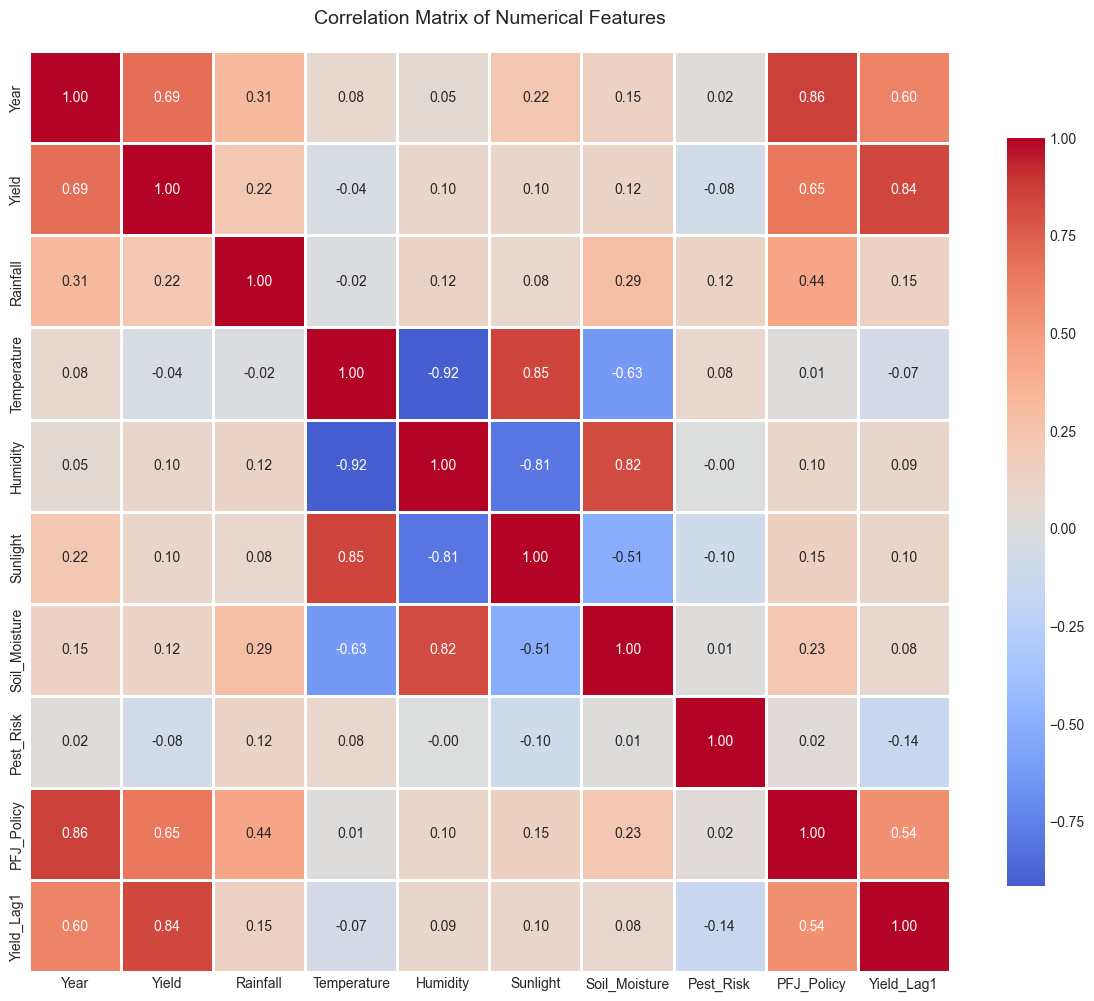

In [26]:
# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax, 
            cbar_kws={"shrink": 0.8})
ax.set_title('Correlation Matrix of Numerical Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

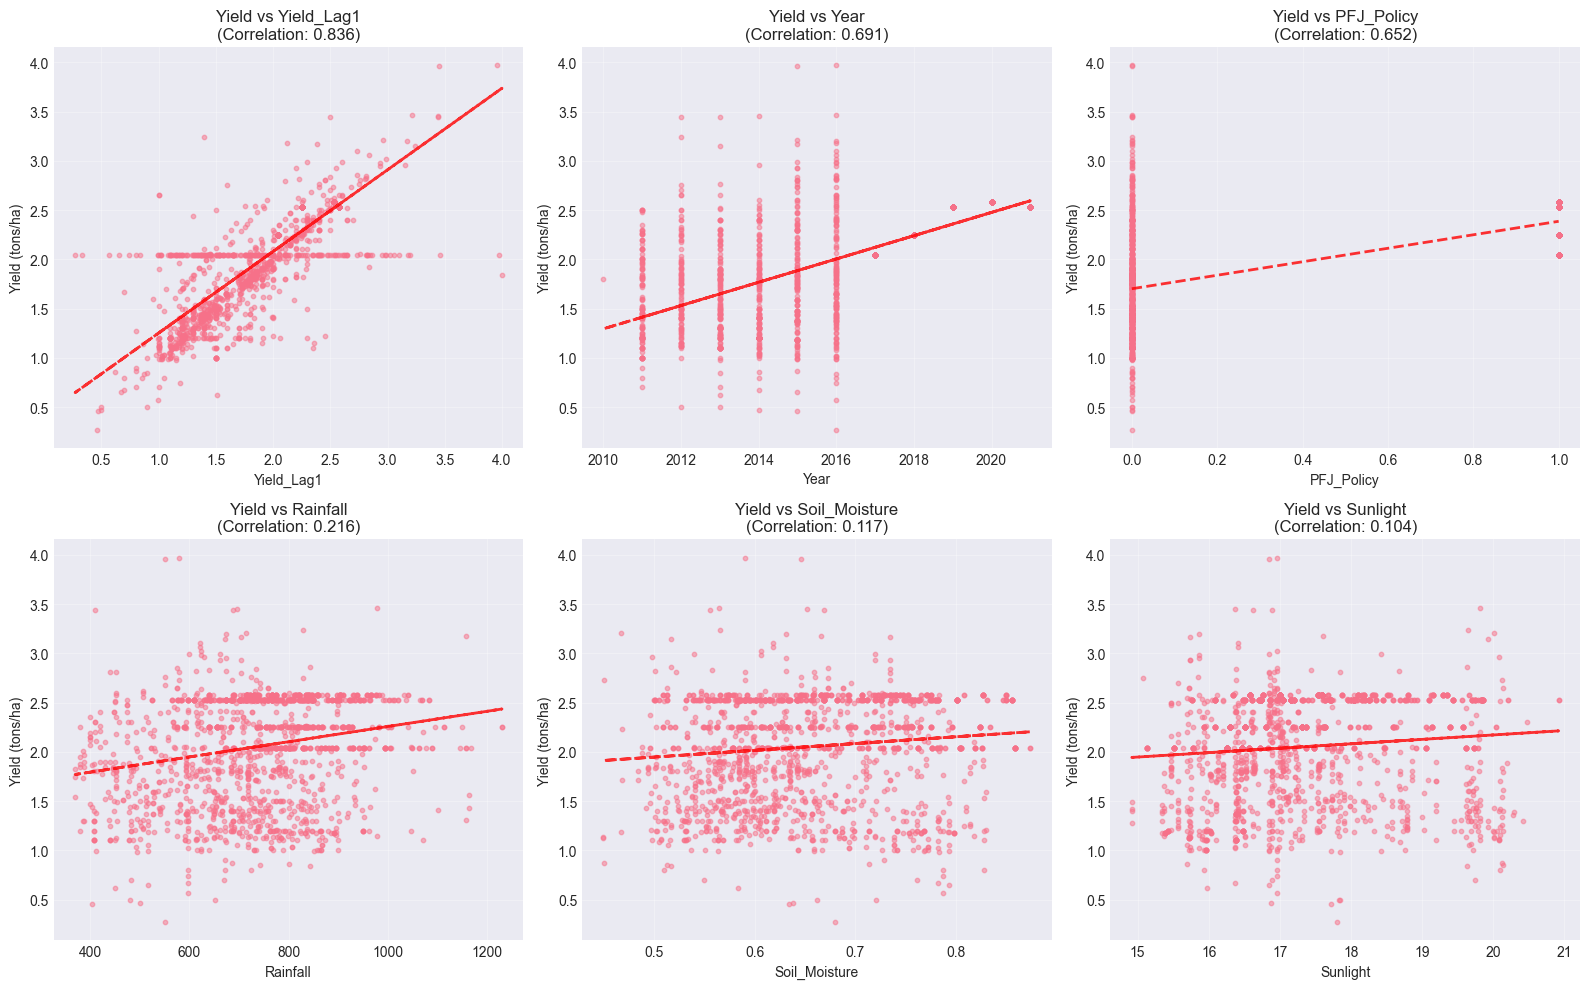

In [27]:
# Scatter plots for high correlation features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Top correlated features with Yield
top_corr_features = yield_corr[1:7].index.tolist()  # Skip Yield itself

for idx, feature in enumerate(top_corr_features):
    axes[idx].scatter(df[feature], df['Yield'], alpha=0.5, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Yield (tons/ha)')
    axes[idx].set_title(f'Yield vs {feature}\n(Correlation: {yield_corr[feature]:.3f})')
    
    # Add trend line
    z = np.polyfit(df[feature].dropna(), df.loc[df[feature].notna(), 'Yield'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

9. Outlier Detection

In [28]:
# Detect outliers using IQR method
print("=" * 80)
print("OUTLIER DETECTION (IQR METHOD)")
print("=" * 80)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_features = ['Yield', 'Rainfall', 'Temperature', 'Humidity', 'Sunlight', 'Soil_Moisture', 'Yield_Lag1']

outlier_summary = []
for feature in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    outlier_summary.append({
        'Feature': feature,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': f"{(len(outliers) / len(df) * 100):.2f}%",
        'Lower_Bound': f"{lower:.2f}",
        'Upper_Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

OUTLIER DETECTION (IQR METHOD)
      Feature  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound
        Yield              3              0.17%        0.33        3.85
     Rainfall             13              0.73%      369.39     1110.25
  Temperature              3              0.17%       23.30       29.12
     Humidity             17              0.96%       67.21       98.69
     Sunlight              4              0.23%       14.12       20.39
Soil_Moisture              0              0.00%        0.37        0.94
   Yield_Lag1              3              0.17%        0.04        3.94


10. Temporal Analysis

In [29]:
# Data availability by year
print("=" * 80)
print("DATA AVAILABILITY BY YEAR")
print("=" * 80)

year_summary = df.groupby('Year').agg({
    'District': 'count',
    'Yield': ['mean', 'std', 'min', 'max']
}).round(2)
year_summary.columns = ['Record_Count', 'Mean_Yield', 'Std_Yield', 'Min_Yield', 'Max_Yield']
print(year_summary)

DATA AVAILABILITY BY YEAR
      Record_Count  Mean_Yield  Std_Yield  Min_Yield  Max_Yield
Year                                                           
2010             1        1.80        NaN       1.80       1.80
2011           121        1.58       0.44       0.70       2.50
2012           108        1.71       0.49       0.50       3.44
2013           158        1.62       0.47       0.50       3.44
2014           160        1.60       0.47       0.47       3.45
2015           160        1.80       0.57       0.46       3.96
2016           157        1.88       0.62       0.27       3.97
2017           182        2.04       0.00       2.04       2.04
2018           182        2.25       0.00       2.25       2.25
2019           182        2.53       0.00       2.53       2.53
2020           182        2.58       0.00       2.58       2.58
2021           182        2.53       0.00       2.53       2.53


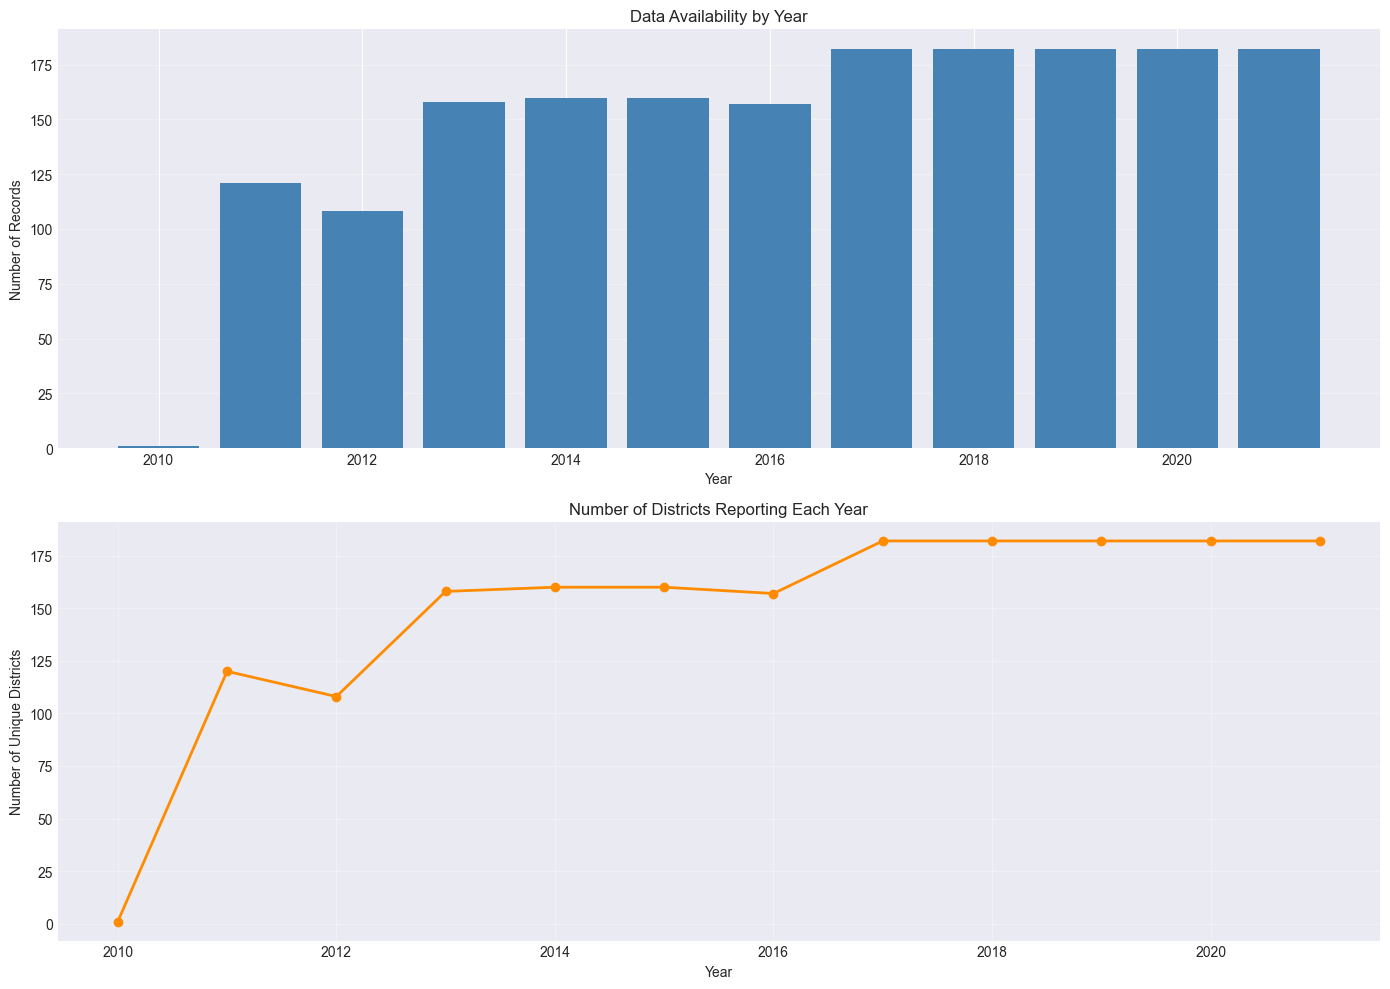

In [30]:
# Visualize data availability
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Records per year
year_counts = df.groupby('Year').size()
axes[0].bar(year_counts.index, year_counts.values, color='steelblue')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Records')
axes[0].set_title('Data Availability by Year')
axes[0].grid(True, alpha=0.3, axis='y')

# Districts per year
districts_per_year = df.groupby('Year')['District'].nunique()
axes[1].plot(districts_per_year.index, districts_per_year.values, marker='o', linewidth=2, color='darkorange')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Unique Districts')
axes[1].set_title('Number of Districts Reporting Each Year')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

11. Summary and Key Findings

In [31]:
print("=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

print(f"""
📊 DATASET OVERVIEW:
- Total Records: {len(df):,}
- Time Period: {df['Year'].min()} - {df['Year'].max()}
- Number of Districts: {df['District'].nunique()}
- Number of Features: {df.shape[1]}

🎯 TARGET VARIABLE (Yield):
- Mean: {df['Yield'].mean():.2f} tons/ha
- Median: {df['Yield'].median():.2f} tons/ha
- Std Dev: {df['Yield'].std():.2f} tons/ha
- Range: {df['Yield'].min():.2f} - {df['Yield'].max():.2f} tons/ha

🌾 DATA QUALITY:
- Missing Values: {df.isnull().sum().sum()}
- Duplicate Rows: {df.duplicated().sum()}

🔑 TOP CORRELATED FEATURES WITH YIELD:
{yield_corr.head(6).to_string()}

💡 IMPORTANT OBSERVATIONS:
1. PFJ Policy Impact: {'Significant' if p_value < 0.05 else 'Not Significant'} (p-value: {p_value:.4f})
2. Average yield increased from {df[df['Year'] == 2011]['Yield'].mean():.2f} (2011) to {df[df['Year'] == 2021]['Yield'].mean():.2f} (2021)
3. Most common soil type: {df['Soil_Type'].mode()[0]}
4. Districts with complete data: {len(df.groupby('District').filter(lambda x: len(x) == 11))} out of {df['District'].nunique()}
""")


KEY FINDINGS SUMMARY

📊 DATASET OVERVIEW:
- Total Records: 1,775
- Time Period: 2010 - 2021
- Number of Districts: 182
- Number of Features: 12

🎯 TARGET VARIABLE (Yield):
- Mean: 2.05 tons/ha
- Median: 2.20 tons/ha
- Std Dev: 0.53 tons/ha
- Range: 0.27 - 3.97 tons/ha

🌾 DATA QUALITY:
- Missing Values: 0
- Duplicate Rows: 0

🔑 TOP CORRELATED FEATURES WITH YIELD:
Yield            1.000000
Yield_Lag1       0.835765
Year             0.690884
PFJ_Policy       0.651963
Rainfall         0.215820
Soil_Moisture    0.117375

💡 IMPORTANT OBSERVATIONS:
1. PFJ Policy Impact: Significant (p-value: 0.0000)
2. Average yield increased from 1.58 (2011) to 2.53 (2021)
3. Most common soil type: Forest Ochrosol
4. Districts with complete data: 1166 out of 182

